# Matrix Transformation
$R^{n}$ 에서 $R^{m}$ 으로 mapping 하는 선형변환을 matrix A d의 행렬변환으로 표현하는 방법을 알아보자.  
  
열벡터 $x_{1}, \cdots, x_{n}$ 를 $T: R^{n} \rightarrow R^{m}$에 대해서 선형변환하는 것은 중첩의 원리에 의해서 $R^{n}$ 상의 정규 직교 벡터들 $e_{1}, \cdots, e_{n}$ 을 각각 T에 대해서 선형변환을 하고 x에 대해서 선형결합을 하는 것과 같다.

$$
\begin{align}
    T(x) &= x_{1} T(e_{1}) + \cdots + x_{n}T(e_{n}) \\
    &=
    \begin{bmatrix}
    T(e_{1}) & \cdots & T(e_{n})
    \end{bmatrix}
    \begin{bmatrix}    
    x_{1} \\
    \vdots \\
    x_{n} \\
    \end{bmatrix}
\end{align}
$$

이때 행렬 A = $\begin{bmatrix}T(e_{1}) & \cdots & T(e_{n}) \end{bmatrix}$가 다음과 같이 불린다.
- T 의 표준행렬 (standard matrix for T)
- A 에 대응하는 변환 (Transformation corresponding to A)
- A 에 의해 표현되어지는 변환 (Transformation represented by A)
- 변환 A (Transformation A)

행렬변환 중 선형변환이라고 알려진 회전변환, 반사변환, 직교투영변환에 대해서 알아보고 단위사각형을 선형 변환해보자.
## 회전변환 

회전변환에 대해서 살펴보자.

빨강색 x축 y축에 대해서 $\theta$만큼 회전을 시키면 각 축은 파란색으로 표현된다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQT7pTXFKtZ8hICglkBk42y9yHiefXsLrYfIg&usqp=CAU" width=300>

이를 통해 A를 구하면 다음과 같다.
$$
{\begin{bmatrix}\cos \theta &-\sin \theta \\
\sin \theta &\cos \theta \end{bmatrix}}
$$
어떤 벡터 $x_{0}$에 대해서 선형변환을 여러번 적용하여 구한 자취를 보고 기하학적인 관점에서 고찰해 볼수 있다. A에대한 멱수열 $x_{0}, Ax_{0}, \dots, A^{k} x_{0}, \dots $을 구해보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

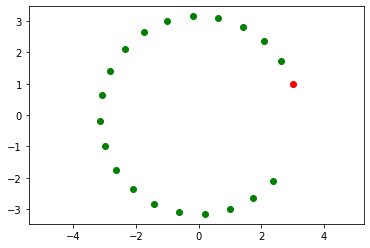

In [2]:
def rotation(theta):
    A = np.array([[np.cos(theta),-np.sin(theta)],
                 [np.sin(theta), np.cos(theta)]])
    return A

x0 = np.array([3,1])
A = rotation(np.pi/12)
ys = [x0]
for i in range(20):
    ys.append(A@ys[-1])    
ys = np.array(ys)

plt.axis('equal')
plt.scatter(x0[0],x0[1], color='r')
plt.scatter(ys[1:,0],ys[1:,1], color='g')

## 반사변환

### 원점을 지나는 직선에 대한 대칭변환

기울기가 $\theta$인 원점을 지나는 직선에 대해 정규직교벡터를 대칭변환하면 아래와 같은 관계를 도출 할 수 있다.  
  
<img src="./images/symmetric.jpg" width = 400>  

대칭변환 행렬은 다음과 같다.  

$$
{\begin{bmatrix}\cos 2\theta & \sin 2\theta \\
\sin 2\theta & -\cos 2\theta \end{bmatrix}}
$$

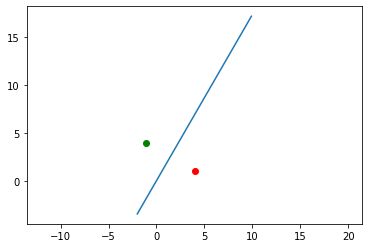

In [3]:
def treflection(theta):
    A = np.array([[np.cos(2*theta), np.sin(2*theta)],
                  [np.sin(2*theta), -np.cos(2*theta)]])
    return A

x0 = np.array([4,1])
theta = np.pi/3
Ht = treflection(theta)
x1 = Ht@x0
plt.axis('equal')
plt.scatter(x0[0],x0[1], color='r')
x = np.arange(-2,10, 0.1)
y = np.tan(theta)*x
plt.plot(x, y)
plt.scatter(x1[0],x1[1], color='g')

### 기울기가 m인 직선에 대한 대칭변환 

원점을 지나고 기울기가 m인 직선을 y=mx라고 하면 
$$
cos \theta =  \frac{1}{\sqrt{1 + m^{2}}},
sin \theta =  \frac{m}{\sqrt{1 + m^{2}}}
$$
의 관계를 통해서
$$
H = \frac{1}{\sqrt{1 + m^{2}}}
{\begin{bmatrix}1 - m^{2} & 2m \\
2m & m^{2} - 1 \end{bmatrix}}
$$
를 도출 할 수 있다.

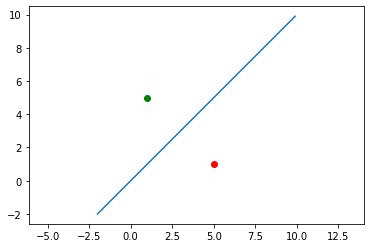

In [4]:
def mreflection(m):
    A = np.array([[1 - m**2, 2*m],
                  [2*m, m**2 - 1]])
    return 1/(1+m**2)*A

x0 = np.array([5,1])
m = 1
Hm = mreflection(m)
x1 = Hm@x0
plt.axis('equal')
plt.scatter(x0[0],x0[1], color='r')
x = np.arange(-2,10, 0.1)
y = m*x
plt.plot(x, y)
plt.scatter(x1[0],x1[1], color='g')

## 직교투영 (Orthogonal Projection)
임의의 벡터 $x$와 반사벡터 $H_{\theta}x$ 의 차는 직교투영벡터와 평행방향이라는 관계를 통해 직교 투영행렬을 도출한다.
$$
\begin{align}
    x - H_{\theta}x &= -2(T(x)-x) \\
    T(x) &= \frac{1}{2}(H_{\theta}+ 1)x \\
    &= \begin{bmatrix} 
        \cos^{2} \theta & \sin \theta \cos \theta \\
        \sin \theta \cos \theta & \sin^{2} \theta 
    \end{bmatrix}
\end{align}
$$

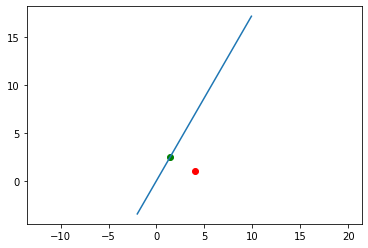

In [5]:
def tprojection(theta):
    P = np.array([[np.cos(theta)**2, np.sin(theta) * np.cos(theta)],
                  [np.sin(theta)* np.cos(theta), np.sin(theta)**2]])
    return P

x0 = np.array([4,1])
theta = np.pi/3
Pt = tprojection(theta)
x1 = Pt@x0
plt.axis('equal')
plt.scatter(x0[0],x0[1], color='r')
x = np.arange(-2,10, 0.1)
y = np.tan(theta)*x
plt.plot(x, y)
plt.scatter(x1[0],x1[1], color='g')

## 단위사각형의 선형변환
단위사각형을 회전변환, 반사변환 그리고 투영변환해보자.

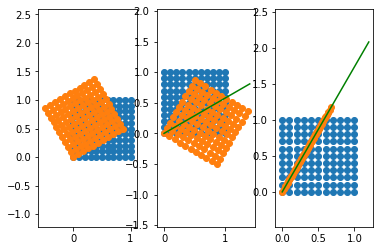

In [6]:
x = np.arange(0,1.1,0.1)
x1, x2 = np.meshgrid(x,x)

f, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.axis('equal')
ax1.scatter(x1,x2)
R = rotation(np.pi/6)
x = np.array([x1.flatten(),x2.flatten()])
Rot_x = R@x
ax1.scatter(Rot_x[0],Rot_x[1])

ax2.axis('equal')
ax2.scatter(x1,x2)
theta = np.pi / 6
S = treflection(np.pi/6)
x = np.array([x1.flatten(),x2.flatten()])
Ref_x = S@x
ax2.plot(np.arange(0,1.5,0.1),np.tan(theta)*np.arange(0,1.5,0.1),'g')
ax2.scatter(Ref_x[0],Ref_x[1])

ax3.axis('equal')
ax3.scatter(x1,x2)
theta = np.pi/3
P = tprojection(theta)
x = np.array([x1.flatten(),x2.flatten()])
ax3.plot(np.arange(0,1.3,0.1),np.tan(theta)*np.arange(0,1.3,0.1),'g')
Proj_x = P@x
ax3.scatter(Proj_x[0],Proj_x[1])

# 하우스 홀더 변환

직교 투영 변환과 반사변환 사이의 관계를 통해서 임의의 평면에 대한 반사변환 행렬을 만들어 낼 수 있다. 이것을 하우스 홀더 변환이라고 한며 QR분해에서 활용된다.

<div style="width:200px; height:200px; border:1px solid red; float:left; margin-right:10px; background-color: white;">
<img src="https://math.vanderbilt.edu/sapirmv/msapir/Images/projection.gif" >
</div>
<div style="width:200px; height:200px; border:1px solid green; float:left; background-color: white;">
<img src="https://math.vanderbilt.edu/sapirmv/msapir/Images/reflection.gif">
</div>

평면 a에 애해서 Reflection과 Projection은 다음과 같은 관계가 성립한다.  

$$
\begin{align}
x - \mathcal{refl}_{a^{\bot}}(x) &= 2 \mathcal{proj}_{a}(x) \\
\mathcal{refl}_{a^{\bot}}(x) &= x - 2 \mathcal{proj}_{a}(x) \\
&= x - 2\frac{x \cdot a}{||a||^{2}} a
\end{align}
$$
만약 평면의 법선벡터 $a^{\bot}$를 안다면 $\mathcal{refl}_{a^{\bot}}(x)$에 대한 표준행렬인 하우스홀더 변환 행렬 $H_{a^{\bot}}$을 구할 수 있다
$$
H_{a^{\bot}} = I - \frac{2}{a^{T} a} a a^{T}
$$
예제를 통해 살펴보자.

H: [[ 0.9  0.2 -0.2]
 [ 0.2  0.   1. ]
 [-0.2  1.   0. ]]
w: [-0.   4.1 -0.1]


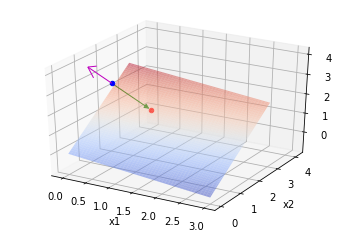

In [117]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
np.set_printoptions(precision=1, suppress=True)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
a = np.array([1,-4,4])
v = np.array([1,0,4])

x = np.linspace(0,3,100)
x = np.meshgrid(x,x)

def hyperplane(a,x):
    return (-a[0]*x[0]-a[1]*x[1])/a[2]

def HouseholderRefl(a):
    a = a.reshape(len(a),1)    
    return np.eye(len(a), dtype=float) - (2.0/(a.T@a))* a@a.T

H = HouseholderRefl(a)
w = H@v

ax = plt.gca(projection='3d')
ax.plot_surface(x[0],x[1], hyperplane(a,x), cmap='coolwarm', alpha=0.5)
ax.scatter(v[0],v[1],v[2], color='b')
ax.scatter(w[0],w[1],w[2], color='r')
ax.add_artist(Arrow3D([v[0],w[0]],[v[1],w[1]],[v[2],w[2]], 
                      mutation_scale=10, lw=1, arrowstyle="-|>", color="g"))
ax.quiver(v[0], v[1], v[2], a[0], a[1], a[2], 
          length=3, lw=1, normalize=True, color='m')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
print("H: {}".format(H))
print("w: {}".format(w))